<a href="https://colab.research.google.com/github/angienar/Data110/blob/main/Data110_Angie_Ayala_Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Dataset

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# View the first few rows of the dataset
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
plt.style.use('ggplot')

# Part 1: Understanding the Dataset
1. Task 1: Dataset Overview
- Briefly describe the Titanic dataset. What kind of information is contained in each column?
Deliverable: Write a paragraph summarizing the dataset based on your exploration.

Response:
  The titanic dataset includes information about each passenger, more specifically the columns are about gender, far, class, and age. The data set interestingly has three columns dedicated to the sex of the passenger.The columns are sex (female or male), who (man or woman), and adult_male (true or false). It also had multiple columns for whether the passenger survived and the town in which they embarked one uses the name of the townand the other uses the initial of the town. There is also a column called sibsp which stands for the number of siblings/spouses aboard. There a different column which is called parch which is the number of parents/children aboard.

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#Part 2: Fare and Survival Analysis
2. Task 2: Fare Distribution

- Plot a histogram and KDE for the distribution of fares paid by passengers.
Question: What trends or outliers do you observe in the fare distribution? How might fare impact survival rates?

Response:
  A trend I notices was that the frequency decreases as the fare increases. There is a large frequency when the fare is close to 0, meaning many people bought tickets with a lower fare and were probably in lower classes. There is an outlier of a few people whose fare was more than 500. I believe the more someone paid for their fare the higher probability of survival they had. Since they spent more on their ticket they would have priority over the people who spent less.


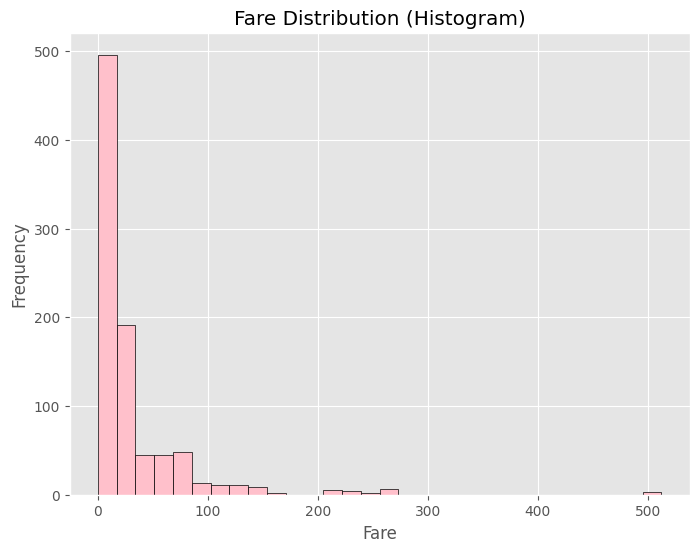

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(titanic['fare'], bins = 30, color='pink', edgecolor='black')
plt.title('Fare Distribution (Histogram)')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

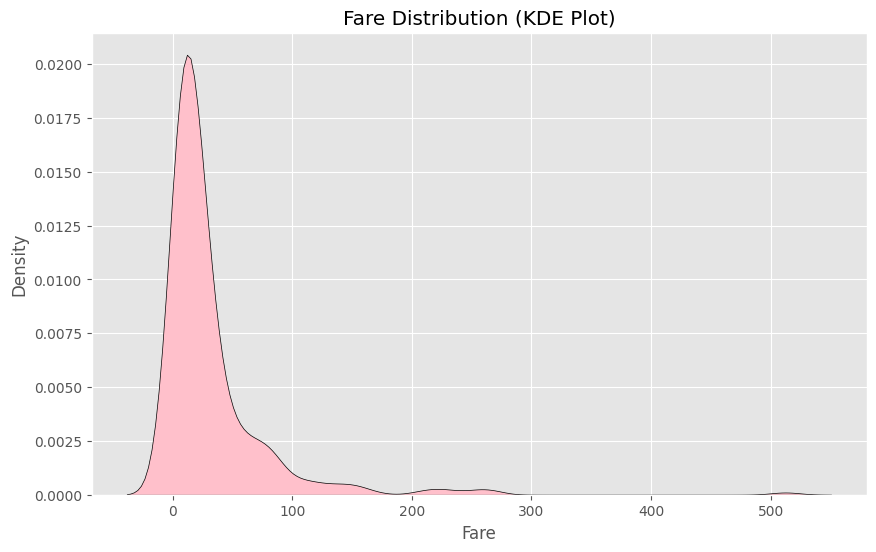

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(titanic['fare'], fill=True, color='pink', alpha = 1, edgecolor = 'black')
plt.title('Fare Distribution (KDE Plot)')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.show()

3. Task 3:Fare and Survival Rates

- Create a KDE plot to compare the fare distributions for survivors and non-survivors.
Question: Does fare seem to have influenced survival? What do the distributions suggest about socioeconomic status and survival?

Response:
Yes, fare seems to have an influence on survival. When you look at the smaller fares there were fewer survivors than non-survivors. However, higher fares had more survivors than non-survivors. The people who paid a higher fare were people who were higher class and wealthier and were probably prioritized during the evacuation.

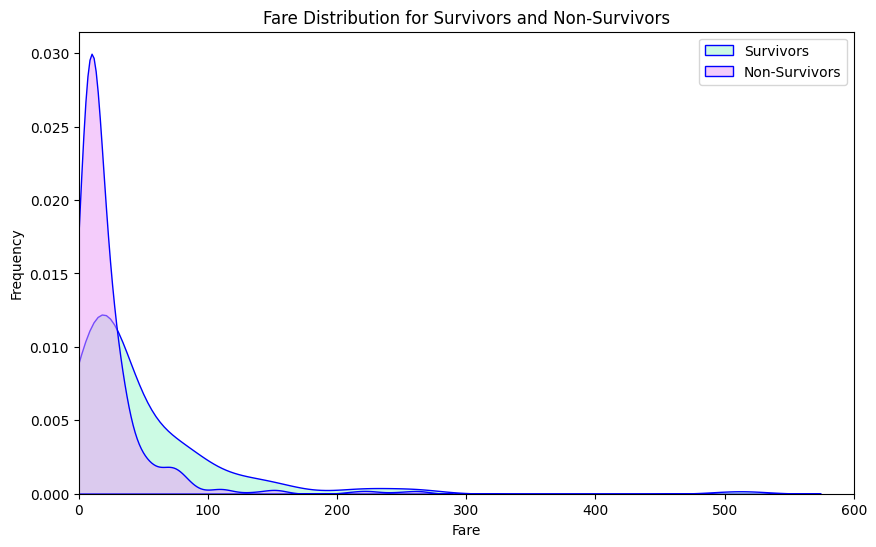

In [ ]:
plt.figure(figsize=(10,6))
sns.kdeplot(titanic[titanic['alive']=='yes']['fare'], fill=True, color='#9AF8CB', alpha=0.5, edgecolor='b')
sns.kdeplot(titanic[titanic['alive']=='no']['fare'], fill=True, color='#EB9AF8', alpha=0.5, edgecolor='b')
#create kde graph to compare survivors and non-survivors
plt.legend(['Survivors', 'Non-Survivors'])
plt.title('Fare Distribution for Survivors and Non-Survivors')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.xlim(0,600)
plt.show()

#Part 3: Class, Fare, and Survival Insights
4. Task 4: Passenger Class, Fare, and Survival
- Create histograms and KDE plots to compare fare distributions across different passenger classes (Pclass) and analyze survival rates for each class.
Question: What patterns do you observe in fare distribution and survival rates across different classes? How does this reflect the socioeconomic divisions on the Titanic?

Response:
  A pattern I observed through the different class was the higher a passangers class, the more likely they were to survive. First class had the highest survival rate and third class had the lowest survival rate. The classes seem to be divided by fare, first class inlcudes the higher fares and third class includes the lower fares. First class was full of the welthiest people on the boat and had the highest survival rate. Third class had people with lower income and seemed to have the lowest survival rate.

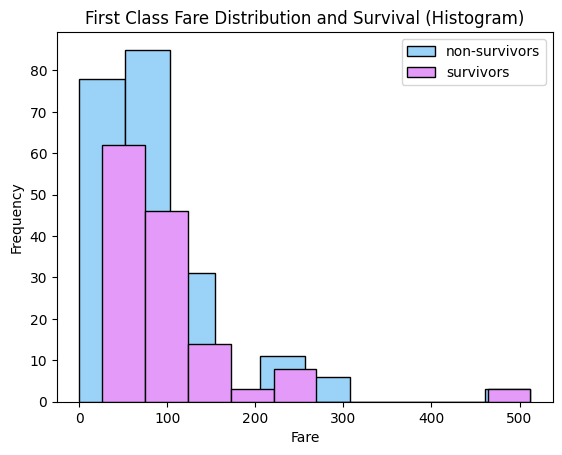

In [ ]:
pfclassd = titanic[(titanic['pclass']==1) & (titanic['survived']== 0)][['fare']]
pfclassd = titanic[(titanic['pclass']==1) & (titanic['survived']== 1)][['fare']]
#creating dataframe for first class

plt.hist(pfclass['fare'], label='non-survivors', color='#9AD2F8', edgecolor='black') #plot the graph and change the color
plt.hist(pfclassd['fare'], label='survivors', color='#E49AF8', edgecolor='black')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.title('First Class Fare Distribution and Survival (Histogram)')
plt.show()

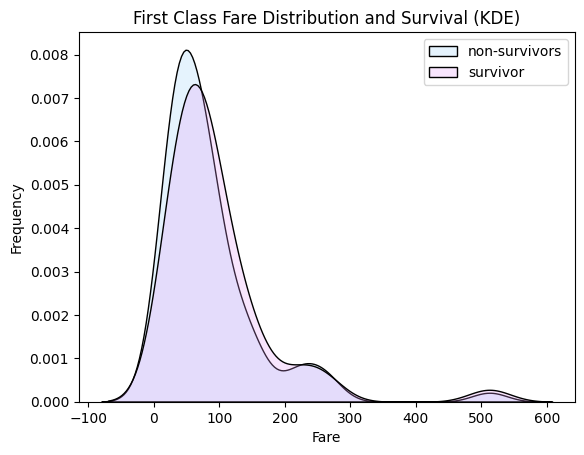

In [ ]:
sns.kdeplot(pfclass['fare'], fill=True, color='#9AD2F8', edgecolor='black')
sns.kdeplot(pfclassd['fare'], fill=True, color='#E49AF8', edgecolor='black')

plt.legend(['non-survivors', 'survivor'])
plt.title('First Class Fare Distribution and Survival (KDE)')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

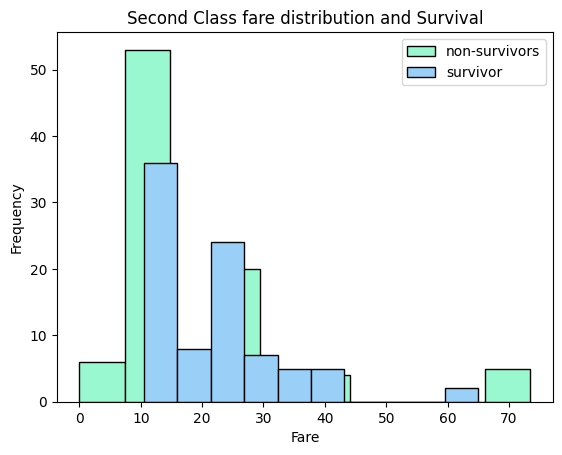

In [ ]:
psclass = titanic[(titanic['pclass']==2) & (titanic['survived']== 0)][['fare']]
psclassd = titanic[(titanic['pclass']==2) & (titanic['survived']== 1)][['fare']]
#create dataframe for second class

plt.hist(psclass['fare'], label='non-survivors', color='#9AF8D0', edgecolor='black')
plt.hist(psclassd['fare'], label='survivor', color='#9AD0F8', edgecolor='black')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.title('Second Class fare distribution and Survival')
plt.show()

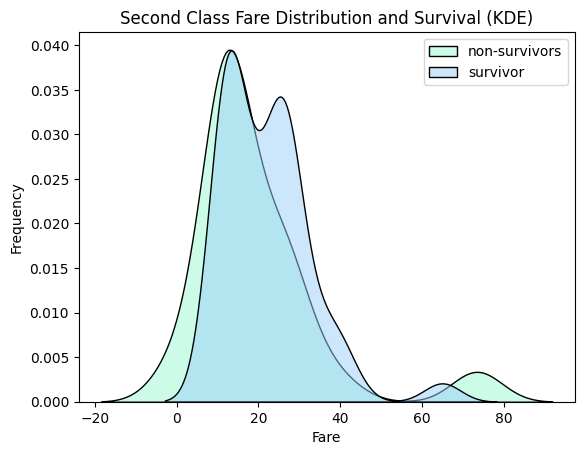

In [ ]:
sns.kdeplot(psclass['fare'], fill=True, color='#9AF8D0', alpha = 0.5, edgecolor='black')
sns.kdeplot(psclassd['fare'], fill=True, color='#9AD0F8', alpha = 0.5, edgecolor='black')
plt.legend(['non-survivors', 'survivor'])
plt.title('Second Class Fare Distribution and Survival (KDE)')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

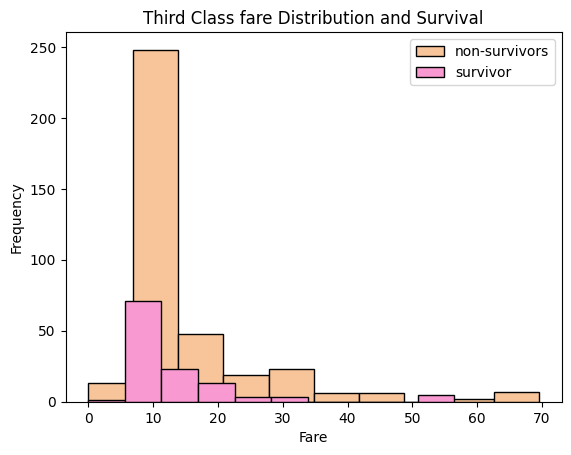

In [ ]:
ptclass = titanic[(titanic['pclass']==3) & (titanic['survived']== 0)][['fare']]
ptclassd = titanic[(titanic['pclass']==3) & (titanic['survived']== 1)][['fare']]
#create dataframe for third class

plt.hist(ptclass['fare'], label='non-survivors', color='#F8C59A', edgecolor='black')
plt.hist(ptclassd['fare'], label='survivor', color='#F89AD1', edgecolor='black')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.legend()
plt.title('Third Class fare Distribution and Survival')
plt.show()

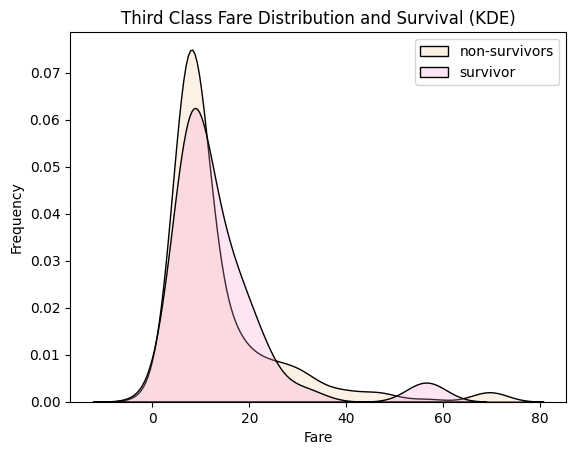

In [ ]:
sns.kdeplot(ptclass['fare'], fill=True, color='#F8C59A', edgecolor='black')
sns.kdeplot(ptclassd['fare'], fill=True, color='#F89AD1', edgecolor='black')
plt.legend(['non-survivors', 'survivor'])
plt.title('Third Class Fare Distribution and Survival (KDE)')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Part 4: Age and Survival
5. Task 5: Age of Survivors and Non-Survivors

- Create KDE plots to compare the age distributions of survivors and non-survivors.
Question: What trends do you notice in the age distribution of survivors compared to those who did not survive? How might age have impacted survival rates?

Response:
  There was a large number of survivors and non-survivors between 20 to 40 years old. There were more survivors than non-survivors in the young ages and very few survivors as the age increased. Most of the passengers on the Titanic were 20 to 40 years old, a few kids and elderly. The lower ages had a higher survival rate, meaning kids were prioritized in the evacuation of the Titanic.

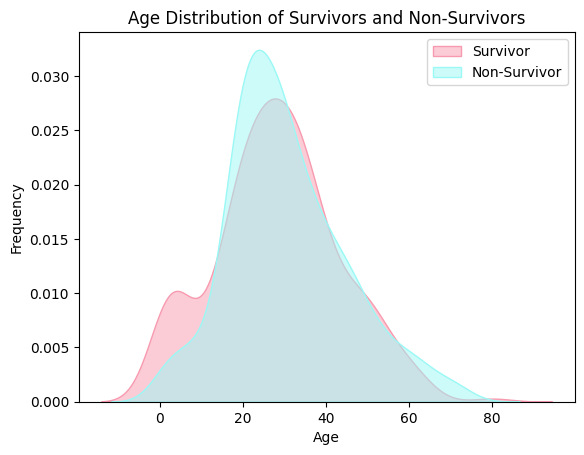

In [ ]:
sns.kdeplot(titanic[titanic['alive']=='yes']['age'], fill=True, alpha=0.5, color ='#F89AAF')
sns.kdeplot(titanic[titanic['alive']=='no']['age'], fill=True, alpha=0.5, color ='#9AF8F5')

plt.legend(['Survivor', 'Non-Survivor'])
plt.title('Age Distribution of Survivors and Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

6. Task 6: Pyramid Histogram for Age Survival by Sex

- Create a pyramid-style histogram (also known as a population pyramid) for age, showing survival data split by sex. If possible, attempt to find or create one.
Question: What can you infer from the age and sex distribution in relation to survival rates?

Response: There was a higher survival for women than there was for men. In the male population the kids had a survival rate. One the titanic women and children were had a higher chance for survival.

In [ ]:
male = titanic[(titanic['sex']=='male') & (titanic['alive']=='yes')]['age']
female = titanic[(titanic['sex']=='female') & (titanic['alive']=='yes')]['age']
# make data frames to seperate the male and female  survivors

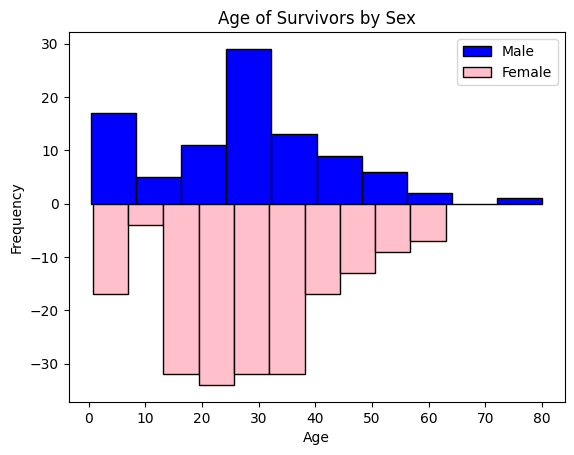

In [ ]:
plt.hist([male], color='blue', edgecolor='black')
plt.hist([female], weights=np.full(len(female), -1), color='pink', edgecolor='black') #weights made it so the female was on the other side (suggestions helped figure it out)
plt.legend(['Male', 'Female'])
plt.title('Age of Survivors by Sex')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
maleN = titanic[(titanic['sex']=='male') & (titanic['alive']=='no')]['age']
femaleN = titanic[(titanic['sex']=='female') & (titanic['alive']=='no')]['age']
# create dataframe for non-survivors seperating females and males

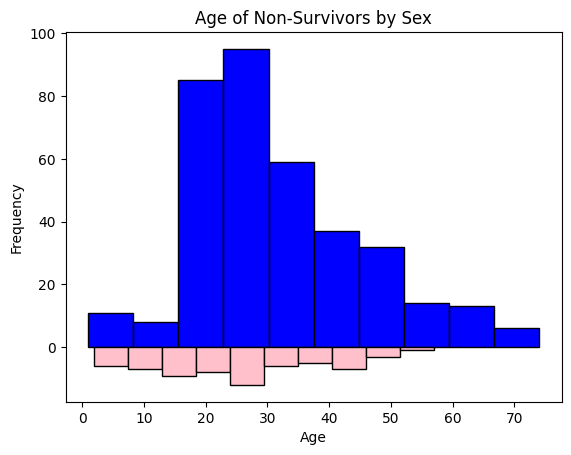

In [ ]:
plt.hist([maleN], color='blue', edgecolor='black')
plt.hist([femaleN], weights=np.full(len(femaleN), -1), color='pink', edgecolor='black')
plt.title('Age of Non-Survivors by Sex')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Optional Task: Exploring Additional Visualizations
7. Task 7 (Optional): Bar Graph, Line Plot, and Scatter Plot
- Create a bar graph, line plot, and scatter plot using the Titanic dataset.
Suggestions: You can explore variables like survival rates, passenger class, age, or fare in these plots. Question: What additional insights do these visualizations provide that weren't evident from the histograms and KDE plots?

Response:
  The scatterplot shows the relationship between the ages of the passengers and fare. There doesn't seem to be any patterns or trends but it was interesting to see the outliers. There were two outliers whose fare was more than 500 and they were in their 30's.

  The box plot shows how many passengers come from each town which was not depicted in the other graphs.

<function matplotlib.pyplot.show(close=None, block=None)>

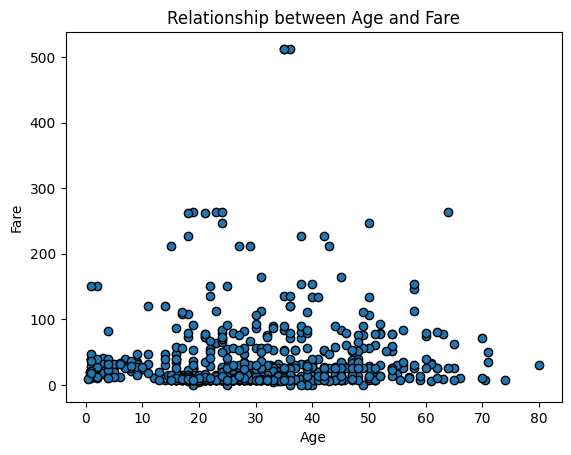

In [3]:
plt.scatter(titanic['age'], titanic['fare'], edgecolor='black')
#create scatter plot
plt.title('Relationship between Age and Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show

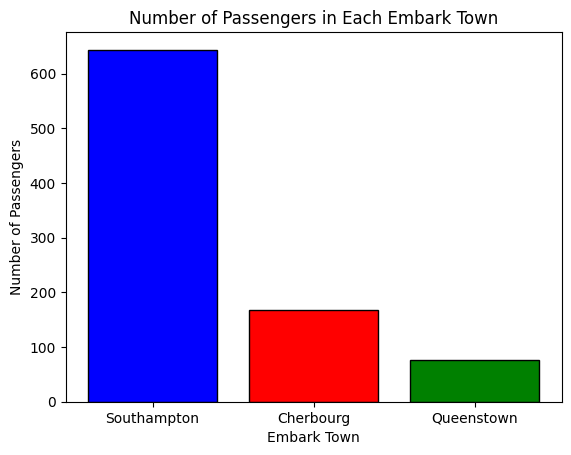

In [7]:
x = titanic['embark_town'].value_counts() # Get the count of each unique embark town
y = titanic['embark_town'].unique() #get the names of the embark towns

#create the bar graph
plt.bar(x.index, x.values, color=['b', 'r', 'g'], edgecolor='black')
# Use x.index for category labels and x.values for frequencies
plt.title('Number of Passengers in Each Embark Town')
plt.xlabel('Embark Town')
plt.ylabel('Number of Passengers')
plt.show()